In [1]:
import os
import sys

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

from torchvision import models

# from torchvision.models import densenet169, resnext101
# from fastai.models.cifar10.wideresnet import wrn_22


%reload_ext autoreload
%autoreload 2
%matplotlib inline

fast_ai_dir = '/media/rene/Data/fastai/'
sys.path.append(fast_ai_dir)

# Set it to use GPU1
torch.cuda.set_device(0)
print(torch.cuda.is_available())
print(torch.cuda.current_device())

True
0


In [2]:
PATH = '/media/rene/Data/data/idc'
SAMPLE_PATH = '/media/rene/Data/data/idc/sample'

In [3]:
bs=256
sz=50
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomCrop(sz), RandomFlip()], pad=sz//8)
data = ImageClassifierData.from_paths(SAMPLE_PATH, val_name='test', tfms=tfms, bs=bs)

 18%|█▊        | 14/76 [00:10<00:45,  1.36it/s, loss=2.37]

/home/rene/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


 92%|█████████▏| 70/76 [00:44<00:03,  1.57it/s, loss=56.4]

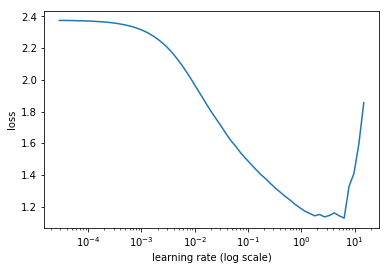

In [4]:
m = wrn_22()

learn = ConvLearner.from_model_data(m, data)
learn.crit = nn.CrossEntropyLoss()
learn.metrics = [accuracy]
wd=1e-4

lrf=learn.lr_find(start_lr=1e-5, end_lr=100)
learn.sched.plot(n_skip=5, n_skip_end=1)

In [7]:
bs=128
sz=50
lr=.01

stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomDihedral()], pad=sz//8)
data = ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

%time learn.fit(lr, 1, wds=wd, cycle_len=30, use_clr_beta=(20,20,0.95,0.85))

  0%|          | 0/76 [00:00<?, ?it/s]

/home/rene/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                  
    0      0.311246   0.325822   0.860644  
    1      0.309531   0.324942   0.855598                  
    2      0.308903   0.339466   0.855598                  
    3      0.303944   0.319762   0.865449                  
    4      0.304703   0.320282   0.859683                  
    5      0.304927   0.311639   0.867131                  
    6      0.301252   0.373033   0.847669                  
    7      0.29737    0.317939   0.864728                  
    8      0.292391   0.349863   0.844786                  
    9      0.289626   0.302695   0.873859                  
    10     0.289775   0.309685   0.872417                  
    11     0.286811   0.329198   0.87482                   
    12     0.283951   0.302301   0.877463                  
    13     0.282755   0.34159    0.858962                  
    14     0.278303   0.323872   0.86593                   
    15     0.273598   0.403924   0.842383               

[array([0.26311]), 0.8909178276236157]

In [ ]:
bs=128
sz=50
lr=.01

stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomDihedral()], pad=sz//8)
data = ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

learn.unfreeze()
%time learn.fit(lr, 1, wds=wd, cycle_len=30, use_clr_beta=(20,20,0.95,0.85))

In [ ]:
bs=256
sz=50
lr=.01

stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomDihedral()], pad=sz//8)
data = ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

%time learn.fit(lr, 1, wds=wd, cycle_len=30, use_clr_beta=(20,20,0.95,0.85))

## More normalish sgdr. Still trained from scratch

In [4]:
m = wrn_22()
learn = ConvLearner.from_model_data(m, data)
learn.crit = nn.CrossEntropyLoss()
learn.metrics = [accuracy]
wd=1e-4

bs=64
sz=50

lr=.003

stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomDihedral()], pad=sz//8)
data = ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

%time learn.fit(lr, 1, cycle_len=1, cycle_mult=1) # train last few layers
lrs = np.array([lr/4,lr/2,lr])

learn.unfreeze()
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, best_save_name='wideRes_sgdr') # train whole model

  2%|▏         | 53/3036 [00:10<09:35,  5.18it/s, loss=2.21] 

/home/rene/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                      
    0      0.310794   0.298979   0.872973  

CPU times: user 9min 17s, sys: 2min 39s, total: 11min 56s
Wall time: 9min 38s


  2%|▏         | 56/3036 [00:10<09:04,  5.48it/s, loss=0.315]

/home/rene/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                      
    0      0.289176   0.276343   0.883062  
    1      0.28922    0.278334   0.884672                      
 23%|██▎       | 712/3036 [02:07<06:56,  5.58it/s, loss=0.277]

KeyboardInterrupt: 

## Pre-trained DenseNet, ResNext

In [10]:
sz = 224
bs = 32
arch = resnext101

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1)
data = ImageClassifierData.from_paths(SAMPLE_PATH, tfms=tfms, bs=bs)
learn = ConvLearner.pretrained(arch, data, precompute=False)

lr =.001
# learn.fit(lr, 1, cycle_len=1, cycle_mult=1) # train last few layers
lrs = np.array([lr/4,lr/2,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2, best_save_name='resnext101_1') # train whole model

  2%|▏         | 12/608 [00:06<05:13,  1.90it/s, loss=0.952]

/home/rene/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                    
    0      0.338761   0.301821   0.878184  
    1      0.364903   0.333011   0.859683                    
    2      0.331145   0.320073   0.867371                    
    3      0.325843   0.319195   0.870495                    
    4      0.312231   0.302981   0.873138                    
    5      0.291791   0.295174   0.879145                    
    6      0.290758   0.29114    0.879625                    


[array([0.29114]), 0.879625180201826]

In [12]:
sz = 50
bs = 32
arch = resnext101

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1)
data = ImageClassifierData.from_paths(SAMPLE_PATH, tfms=tfms, bs=bs)
learn = ConvLearner.pretrained(arch, data, precompute=False)

lr =.001
learn.fit(lr, 1, cycle_len=1, cycle_mult=1) # train last few layers
lrs = np.array([lr/4,lr/2,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2, best_save_name='resnext101_2') # train whole model

 14%|█▎        | 83/608 [00:05<00:32, 16.28it/s, loss=0.683]

/home/rene/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                    
    0      0.424146   0.400868   0.826526  


epoch      trn_loss   val_loss   accuracy                    
    0      0.358446   0.346883   0.85728   
    1      0.361325   0.357479   0.851033                    
    2      0.361008   0.352885   0.852235                    
    3      0.366869   0.34273    0.858481                    
    4      0.32977    0.328921   0.864008                    
    5      0.334218   0.331093   0.857761                    
    6      0.317302   0.32956    0.863767                    


[array([0.32956]), 0.863767419509851]

#### Seems that using the original sized input for these models is better.

In [ ]:
%%capture out1

sz = 224
bs = 32
arch = resnext101

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs)
learn = ConvLearner.pretrained(arch, data, precompute=False)

lr =.001
learn.fit(lr, 1, cycle_len=1, cycle_mult=1) # train last few layers
lrs = np.array([lr/4,lr/2,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2, best_save_name='resnext101_1_full') # train whole model

In [ ]:
out1.show()


In [ ]:
# ??? This won't work. just crashes
sz = 224
bs = 5
arch = densenet169

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1)
data = ImageClassifierData.from_paths(SAMPLE_PATH, tfms=tfms, bs=bs)
learn = ConvLearner.pretrained(arch, data, precompute=False)

lr =.003
learn.fit(lr, 1, cycle_len=1, cycle_mult=1) # train last few layers
lrs = np.array([lr/4,lr/2,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2, best_save_name='densenet169_1') # train whole model

  0%|          | 0/3886 [00:00<?, ?it/s]

### ??? Check if cropping is useful

In [ ]:
tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomCrop(sz), RandomDihedral()], pad=sz//8)
data = ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)


%time learn.fit(lr, 1, wds=wd, cycle_len=10, use_clr_beta=(20,20,0.95,0.85))